## Country Clustering

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

Objective: Categorise the countries using some socio-economic and health factors that determine the overall development of the country and suggest the countries which the CEO needs to focus on the most.

### Reading and Understanding the data

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [55]:
#Importing Country Dataset
df=pd.read_csv(r'C:/Users/Ramanujam SESHADRI/Desktop/PCA and Clustering Assignment/Country-data.csv')

### Basic Data Check

In [56]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [58]:
df.shape

(167, 10)

In [59]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Looks like there quite a few outliers in the given dataset. We will treat the outliers subsequently.

### Missing Value Check

In [60]:
missing_values=df.isna().sum()
print(missing_values)

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


There are no missing values in the given dataset.

In [61]:
# Exports Imports and Health are given in terms of GDPP values so lets convert them
df['exports'] = df['exports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100

### Visualise the data

Univariate Analysis for all the numeric columns.

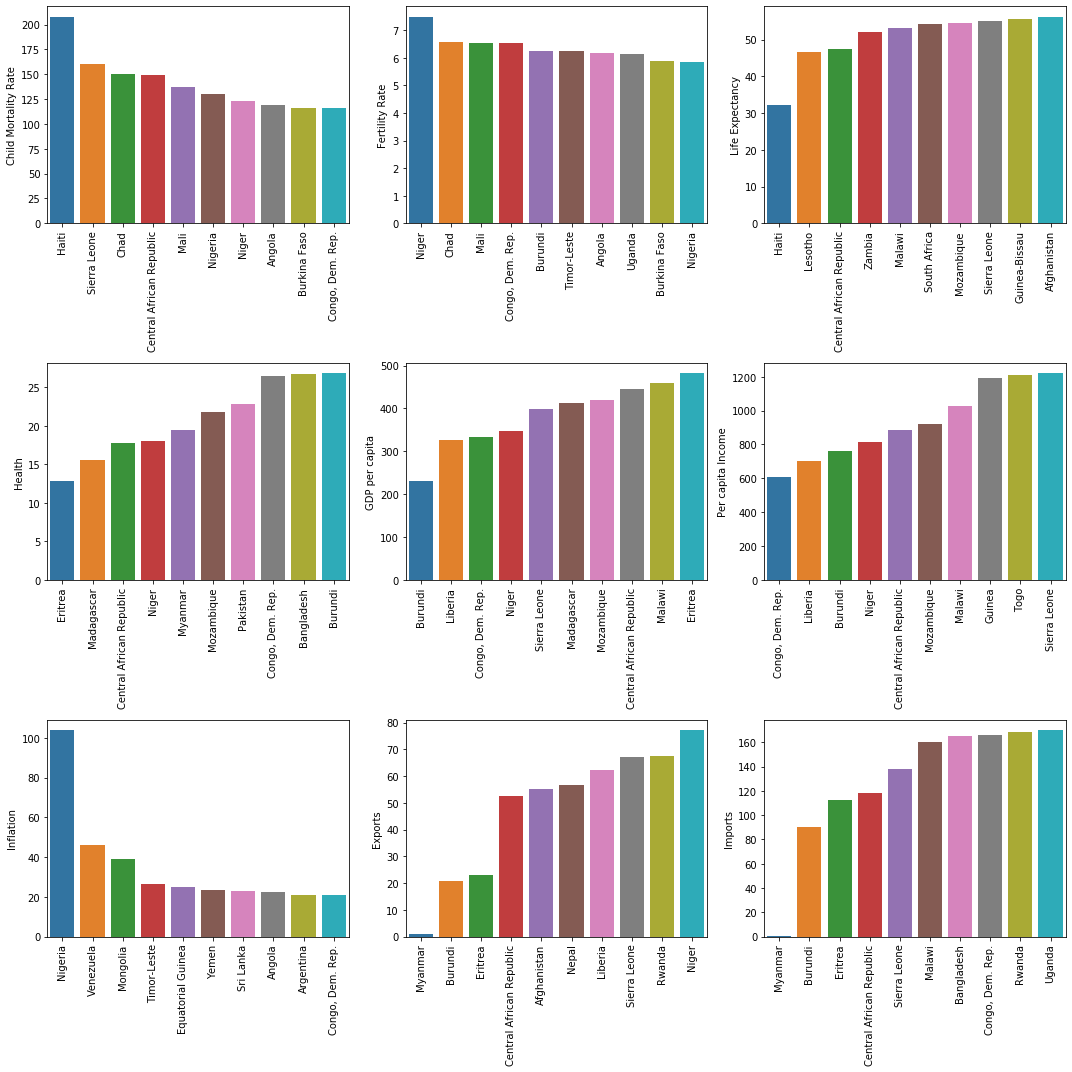

In [62]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

least10_life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= least10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

least10_health = df[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= least10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

least10_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= least10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

least10_income = df[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= least10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

least10_exports = df[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= least10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

least10_imports = df[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= least10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

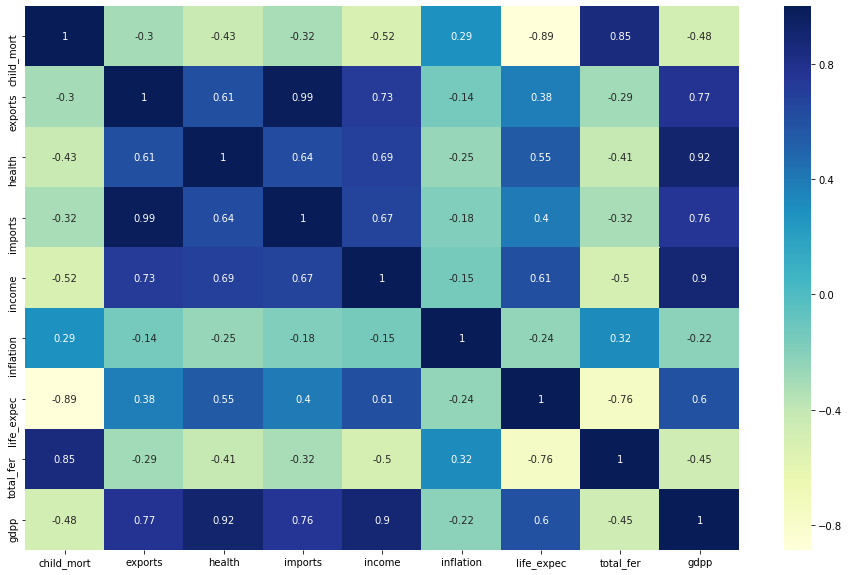

In [63]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.savefig('eda1')
plt.show()

### Outlier Analysis

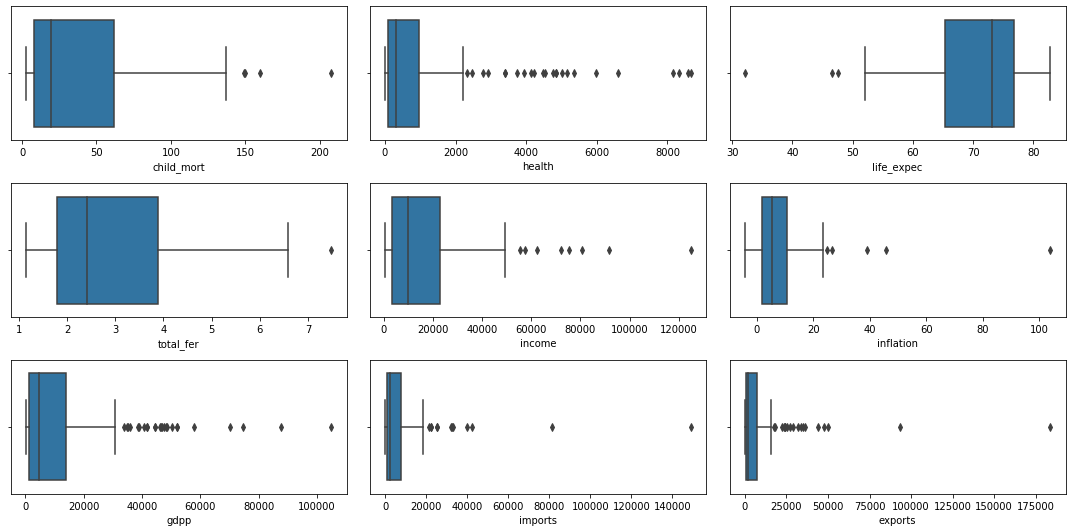

In [64]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df['health'], ax = axs[0,1])
plt3 = sns.boxplot(df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df['income'], ax = axs[1,1])
plt6 = sns.boxplot(df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df['exports'], ax = axs[2,2])
plt.savefig('outlier')
plt.tight_layout()

In [65]:
# Before manipulating data, we will save one copy of orignal data.
data_original = df.copy()

In [66]:
# As we can see there are a number of outliers in the data.

# Keeping in mind we need to identify backward countries based on socio economic and health factors.
# We will cap the outliers to values accordingly for analysis.

percentiles = data_original['child_mort'].quantile([0.05,0.95]).values
data_original['child_mort'][data_original['child_mort'] >= percentiles[1]] = percentiles[1]

percentiles = data_original['health'].quantile([0.05,0.95]).values
data_original['health'][data_original['health'] >= percentiles[1]] = percentiles[1]

percentiles = data_original['life_expec'].quantile([0.05,0.95]).values
data_original['life_expec'][data_original['life_expec'] <= percentiles[0]] = percentiles[0]
data_original['life_expec'][data_original['life_expec'] >= percentiles[1]] = percentiles[1]

percentiles = data_original['total_fer'].quantile([0.05,0.95]).values
data_original['total_fer'][data_original['total_fer'] >= percentiles[1]] = percentiles[1]

percentiles = data_original['income'].quantile([0.05,0.95]).values
data_original['income'][data_original['income'] >= percentiles[1]] = percentiles[1]

percentiles = data_original['inflation'].quantile([0.05,0.95]).values
data_original['inflation'][data_original['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = data_original['gdpp'].quantile([0.05,0.95]).values
data_original['gdpp'][data_original['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = data_original['imports'].quantile([0.05,0.95]).values
data_original['imports'][data_original['imports'] >= percentiles[1]] = percentiles[1]

percentiles = data_original['exports'].quantile([0.05,0.95]).values
data_original['exports'][data_original['exports'] >= percentiles[1]] = percentiles[1]

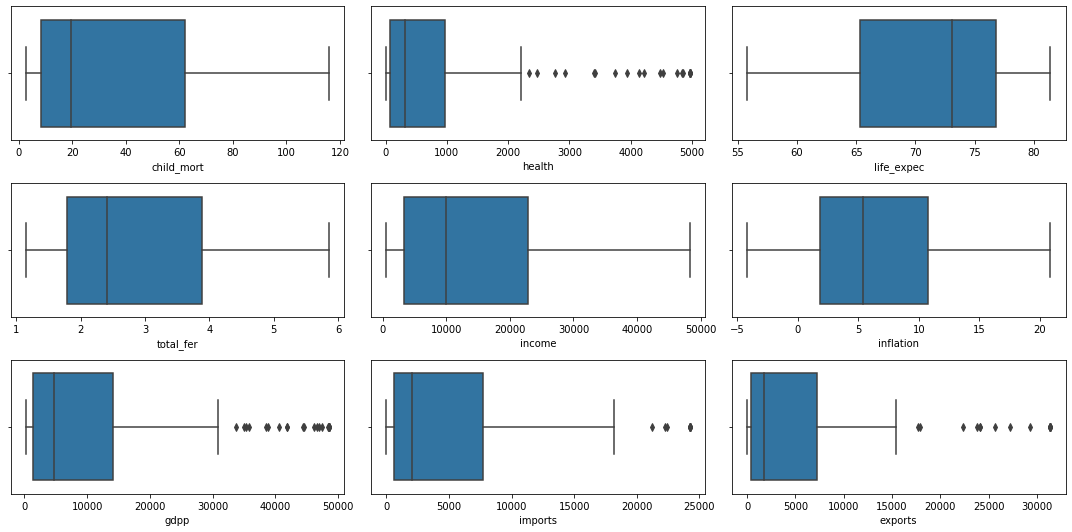

In [67]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(data_original['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data_original['health'], ax = axs[0,1])
plt3 = sns.boxplot(data_original['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data_original['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data_original['income'], ax = axs[1,1])
plt6 = sns.boxplot(data_original['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data_original['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data_original['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data_original['exports'], ax = axs[2,2])
plt.savefig('outlier1')
plt.tight_layout()

We have treated all the outliers except the gdpp, health, import and export column but we can let this be as the clustering will create a seperate cluster for these outliers.

### Scaling the data

In [68]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# Scale these variables using 'fit_transform'
data_original[varlist] = scaler.fit_transform(data_original[varlist])

In [69]:
data_original.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.479341,-0.669581,-0.629435,-0.732729,-0.958349,0.394438,-1.825310,2.016421,-0.757362
1,Albania,-0.559029,-0.542172,-0.473489,-0.472182,-0.394006,-0.383226,0.682454,-0.880535,-0.523321
2,Algeria,-0.262690,-0.475838,-0.530017,-0.560152,-0.192552,1.440750,0.707406,-0.019090,-0.498838
3,Angola,2.193878,-0.418960,-0.588935,-0.543087,-0.667360,2.190136,-1.338729,2.044904,-0.560376
4,Antigua and Barbuda,-0.733509,-0.027134,-0.150685,0.306422,0.227992,-0.862393,0.744836,-0.547072,0.013312


### Performing PCA

In [70]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [71]:
# Putting feature variable to X
X = data_original.drop(['country'],axis=1)

# Putting response variable to y
y = data_original['country']
#Doing the PCA on the train data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

#### Plotting PCA. 
#### We'll plot original features on the first 2 principal components as axes

In [72]:
pca.components_

array([[-0.31375234,  0.35055402,  0.35073308,  0.36805763,  0.37572755,
        -0.17772133,  0.34272322, -0.29809033,  0.37565693],
       [ 0.48817472,  0.33056912,  0.24603225,  0.26937684,  0.16589888,
         0.18984618, -0.34601634,  0.51941807,  0.25734666],
       [-0.17245804,  0.07136154, -0.12859978, -0.04125966,  0.17419301,
         0.93983715,  0.15322486, -0.09903017,  0.00189344],
       [ 0.01881663, -0.53641588,  0.64577536, -0.38055168,  0.00871282,
         0.1001503 ,  0.1864265 ,  0.16027515,  0.28197443],
       [ 0.13154873, -0.090562  ,  0.20303622, -0.04949765,  0.07755599,
         0.07976391, -0.67033196, -0.67950631,  0.0858415 ],
       [ 0.10788102, -0.12349579, -0.42224855, -0.38449929,  0.7481218 ,
        -0.17234195, -0.03282305,  0.06558738,  0.22849485],
       [-0.77509085, -0.03800789,  0.03630943,  0.00544919,  0.05867488,
        -0.02385802, -0.50395502,  0.37065347,  0.03278569],
       [-0.05617497,  0.43893401, -0.15737561, -0.49495493, -0

In [73]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.313752,0.488175,child_mort
1,0.350554,0.330569,exports
2,0.350733,0.246032,health
3,0.368058,0.269377,imports
4,0.375728,0.165899,income


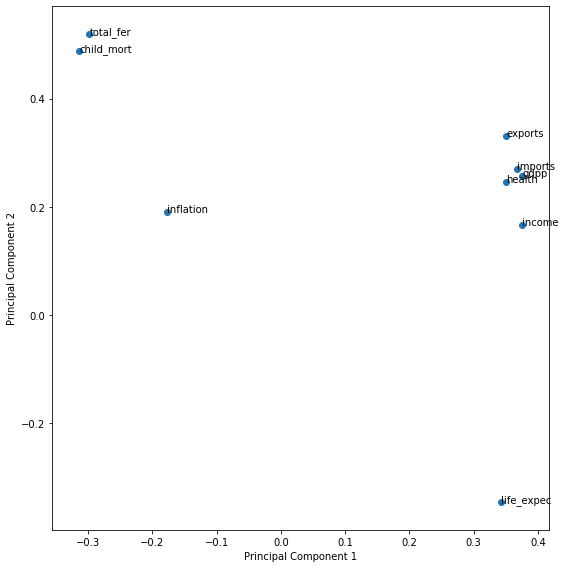

In [74]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.savefig('pc2')
plt.show()

#### Looking at the screeplot to assess the number of needed principal components

In [75]:
pca.explained_variance_ratio_

array([0.68631727, 0.14660793, 0.09438189, 0.0316385 , 0.01635279,
       0.01188722, 0.00892678, 0.0025217 , 0.00136592])

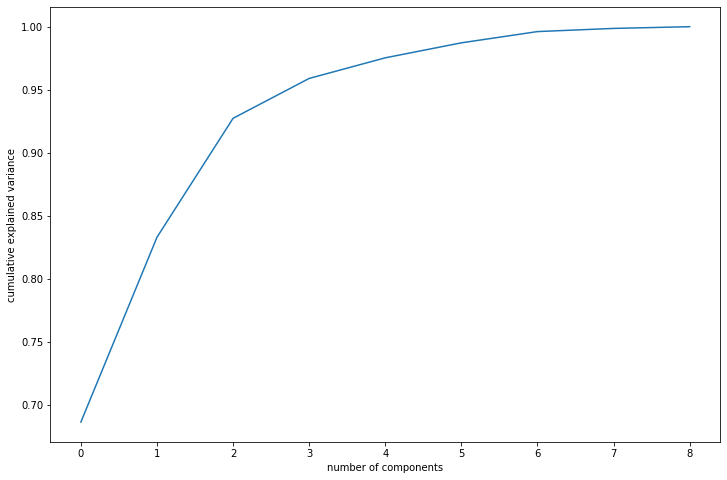

In [76]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

In [77]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [78]:
df_pca = pca_final.fit_transform(X)
df_pca.shape

(167, 4)

In [79]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3
0,-3.130615,1.548326,-0.467760,0.057839
1,-0.134695,-1.662191,-0.100853,-0.043986
2,-0.744147,-0.709121,1.531112,0.265987
3,-3.160577,2.327284,1.222023,0.235226
4,0.942819,-0.986519,-0.471377,-0.239196


In [80]:
pca_df2 = pd.DataFrame({'country': list(y), 'PC1': df_pca[0], 'PC2': df_pca[1], 'PC3': df_pca[2], 'PC4': df_pca[3]})
pca_df2.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-3.130615,1.548326,-0.467760,0.057839
1,Albania,-0.134695,-1.662191,-0.100853,-0.043986
2,Algeria,-0.744147,-0.709121,1.531112,0.265987
3,Angola,-3.160577,2.327284,1.222023,0.235226
4,Antigua and Barbuda,0.942819,-0.986519,-0.471377,-0.239196


In [81]:
#creating correlation matrix for the principal components
corrmatrix = np.corrcoef(df_pca.transpose())

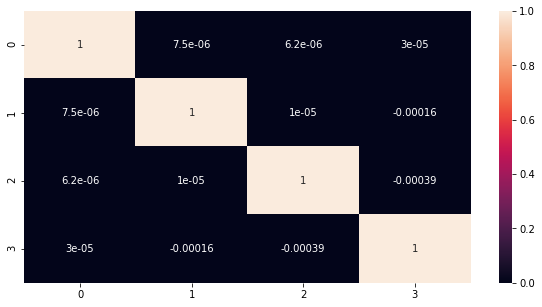

In [82]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmatrix,annot = True)
plt.savefig('corr')

### Hopskins Statistic

In [83]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [84]:
hopkins(pca_df2.drop('country', axis=1))

0.840272776777813

In [85]:
# Now for perfroming clustering, we need to again drop the Country column, Let's drop it
dat3_1 = pca_df2.drop('country', axis = 1)

In [86]:
# Check the shape of the resultant data
dat3_1.head()

,PC1,PC2,PC3,PC4
0,-3.130615,1.548326,-0.467760,0.057839
1,-0.134695,-1.662191,-0.100853,-0.043986
2,-0.744147,-0.709121,1.531112,0.265987
3,-3.160577,2.327284,1.222023,0.235226
4,0.942819,-0.986519,-0.471377,-0.239196


### Silhouette Score

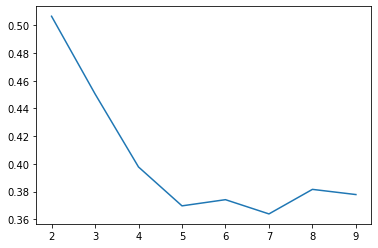

In [87]:
#First we'll do the silhouette score analysis
# To perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(dat3_1)
    ss.append([k, silhouette_score(dat3_1, kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])
plt.savefig('silhouette')

### Elbow Curve

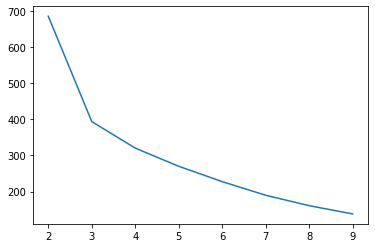

In [88]:
#Now let's proceed to the elbow curve method

ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(dat3_1)
    ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])
plt.savefig('elbow')

### K-Means swith k value as 3

In [89]:
#Let's perform K means using K=3
model_kmean = KMeans(n_clusters = 3, random_state = 50)
model_kmean.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [90]:
pca_df2.columns

Index(['country', 'PC1', 'PC2', 'PC3', 'PC4'], dtype='object')

In [91]:
# Let's add the cluster Ids to the PCs data 
dat_km = pd.concat([pca_df2.reset_index().drop('index', axis = 1), pd.Series(model_kmean.labels_).reset_index().drop('index', axis  =1)], axis = 1)
dat_km.columns = ['country', 'PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']
dat_km.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-3.130615,1.548326,-0.467760,0.057839,1
1,Albania,-0.134695,-1.662191,-0.100853,-0.043986,0
2,Algeria,-0.744147,-0.709121,1.531112,0.265987,0
3,Angola,-3.160577,2.327284,1.222023,0.235226,1
4,Antigua and Barbuda,0.942819,-0.986519,-0.471377,-0.239196,0


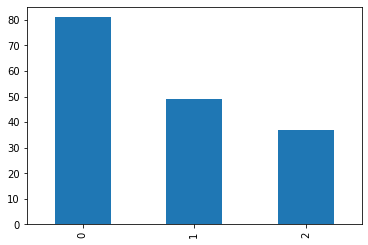

In [92]:
# Check the count of observation per cluster
dat_km['ClusterID'].value_counts().plot(kind = 'bar')
plt.savefig('kcluster')

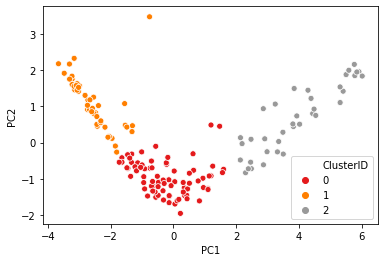

In [93]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'ClusterID', data = dat_km, palette='Set1')
plt.savefig('kscatter')

In [94]:
# Let's merge the original data with the data(ClusterID)
dat5 = pd.merge(df, dat_km[['country', 'ClusterID']], on = 'country')

In [95]:
# Let's drop PCs from the data
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [96]:
dat5.drop('country', axis =1).groupby('ClusterID').mean()  

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterID,,,,,,,,,
0,21.575309,2822.238722,397.370099,2930.954976,12430.617284,7.648877,72.979012,2.274321,6355.975309
1,90.810204,863.367571,113.379124,818.976510,3860.877551,11.923163,59.451020,4.961837,1885.306122
2,5.237838,26171.270270,3749.510541,22235.610811,45056.756757,2.588432,79.956757,1.755676,42102.702703


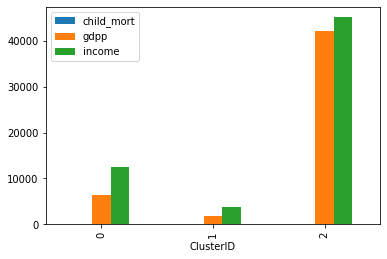

In [97]:
dat5[['child_mort', 'gdpp', 'income', 'ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar')
plt.savefig('kclusters')

In [98]:
dat5[dat5['ClusterID'] ==1]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

The above listed Countries fall into the cluster which are in the direst need of help according to K-Means Clustering

### Hierarchical Clustering

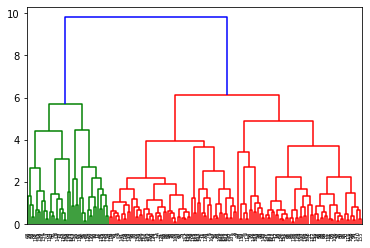

In [99]:
# To perform Hierarchical clustering using complete linkage
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
merge = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(merge)
plt.savefig('dendogram')
plt.show()

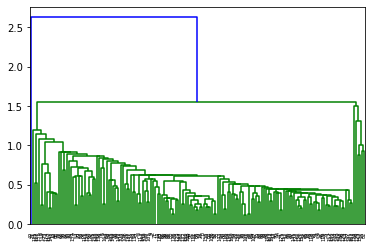

In [100]:
# Hierarchical clustering using single linkage
merge1 = linkage(df_pca, method = "single", metric='euclidean')
dendrogram(merge1)
plt.savefig('dendogram1')
plt.show()

As Single linkage is difficult to read due to the loose clusters we make use of complete linkage

In [101]:
clusterCut = pd.Series(cut_tree(merge, n_clusters = 3).reshape(-1,))
df_pca_hc = pd.concat([df_pca, clusterCut], axis=1)
df_pca_hc.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
df_pca_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-3.130615,1.548326,-0.467760,0.057839,0
1,-0.134695,-1.662191,-0.100853,-0.043986,1
2,-0.744147,-0.709121,1.531112,0.265987,1
3,-3.160577,2.327284,1.222023,0.235226,0
4,0.942819,-0.986519,-0.471377,-0.239196,1


In [102]:
pca_cluster_hc = pd.concat([data_original['country'],df_pca_hc], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
pca_cluster_hc.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-3.130615,1.548326,-0.467760,0.057839,0
1,Albania,-0.134695,-1.662191,-0.100853,-0.043986,1
2,Algeria,-0.744147,-0.709121,1.531112,0.265987,1
3,Angola,-3.160577,2.327284,1.222023,0.235226,0
4,Antigua and Barbuda,0.942819,-0.986519,-0.471377,-0.239196,1


In [103]:
clustered_data_hc = pca_cluster_hc[['country','ClusterID']].merge(df, on = 'country')
clustered_data_hc.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,0,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [104]:
hc_clusters_child_mort = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdpp.mean())

In [105]:
df1 = pd.concat([pd.Series(list(range(0,3))), hc_clusters_child_mort,hc_clusters_exports, hc_clusters_health, hc_clusters_imports,
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
df1.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df1

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,79.895161,903.375999,120.293624,945.356550,4172.467742,10.281532,61.191935,4.550323,2042.322581
1,1,18.950000,2738.284931,425.495944,2799.146813,13294.843750,8.814047,73.959375,2.165469,6720.156250
2,2,5.482927,24584.970732,3458.158537,21036.519512,42770.731707,2.390537,79.402439,1.746341,39226.829268


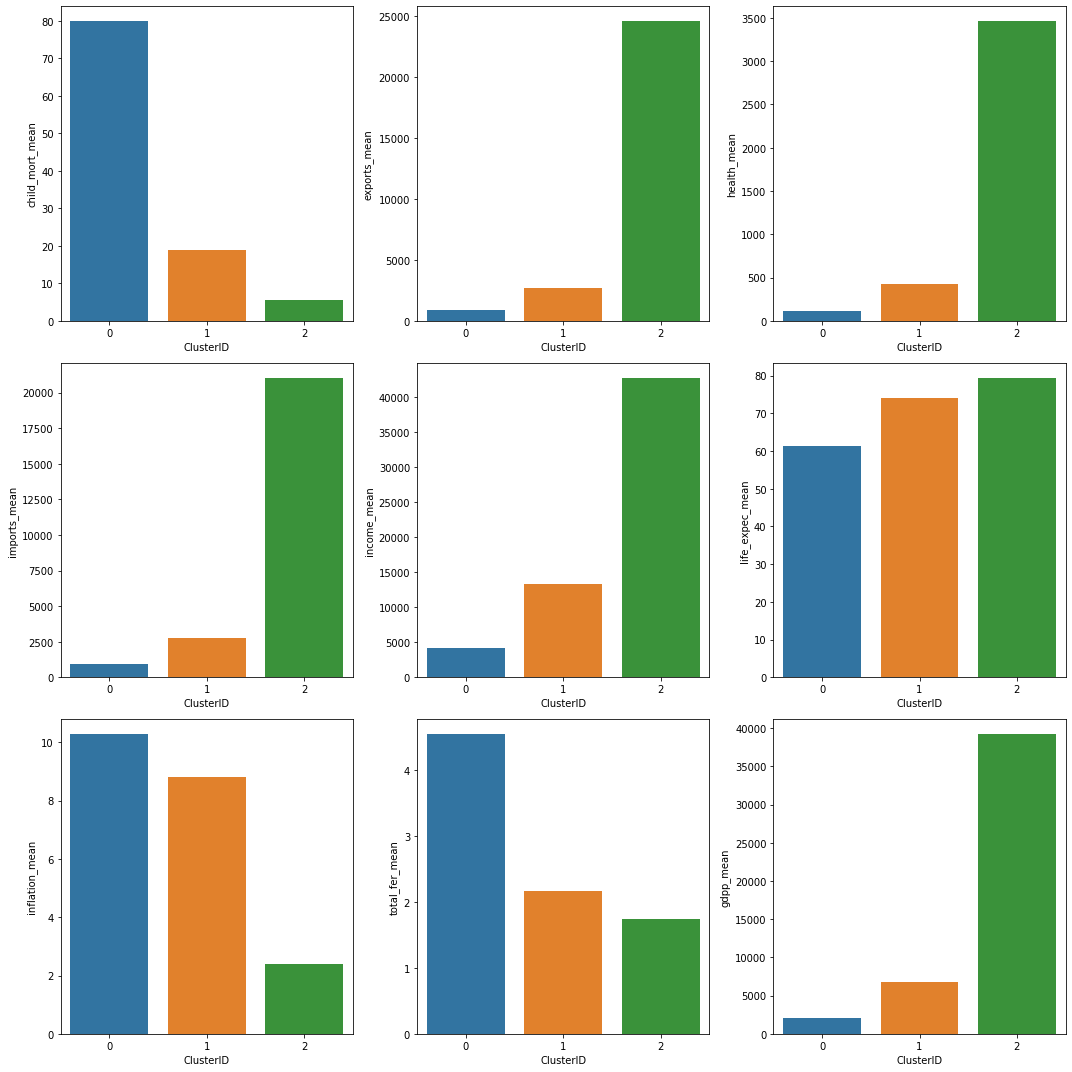

In [106]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df1.ClusterID, y=df1.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df1.ClusterID, y=df1.exports_mean, ax = axs[0,1])
sns.barplot(x=df1.ClusterID, y=df1.health_mean, ax = axs[0,2])
sns.barplot(x=df1.ClusterID, y=df1.imports_mean, ax = axs[1,0])
sns.barplot(x=df1.ClusterID, y=df1.income_mean, ax = axs[1,1])
sns.barplot(x=df1.ClusterID, y=df1.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df1.ClusterID, y=df1.inflation_mean, ax = axs[2,0])
sns.barplot(x=df1.ClusterID, y=df1.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df1.ClusterID, y=df1.gdpp_mean, ax = axs[2,2])
plt.savefig('hcluster')
plt.tight_layout()

In [107]:
clustered_data_hc[clustered_data_hc.ClusterID == 0].country.values

array(['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan',
       'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea',
       'Fiji', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Mozambique',
       'Myanmar', 'Namibia', 'Niger', 'Nigeria', 'Pakistan',
       'Philippines', 'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone',
       'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania',
       'Timor-Leste', 'Togo', 'Tonga', 'Turkmenistan', 'Uganda',
       'Vanuatu', 'Yemen', 'Zambia'], dtype=object)

Above listed are the Countries which are in the direst need of help according to Hierarchical Clustering

The cluster with high child mortality, low income and low gdpp is chosen